### Initialising

In [2]:
# run this the first time you use grblc to download SFD maps

# import grblc.convert.sfd
# grblc.convert.sfd.fetch()

In [1]:
# initialise lightcurve object

from grblc.lightcurve import Lightcurve

grb = '170817A'

lc = Lightcurve(
    grb,
    path = 'raw',
    data_space = 'lin',
    save = True
    )

lc.displayGRB()

### `Photometry` module

Warning: The functions in this module take a while to complete the calculations as it involves cross-matching filters and telescopes for each data point.

In [2]:
# convert to AB system and correct for extinction
# Took 15 minutes for me :)

lc.convertGRB(
            save = True,
            debug = True
            )

Filter i of LCO/Swope(1m)/CISCO not found for the data point at 39289.20000011567 seconds.
Filter H of LCO/Magellan2Clay(6.5m)/LDSS-3 not found for the data point at 39964.08000015188 seconds.
Filter r of LCO/Magellan2Clay(6.5m)/LDSS-3 not found for the data point at 40810.80000013579 seconds.
Filter J of LCO/Magellan2Clay(6.5m)/LDSS-3 not found for the data point at 40810.80000013579 seconds.
Filter z of LCO/Magellan2Clay(6.5m)/LDSS-3 not found for the data point at 40810.80000013579 seconds.
Filter V of LCO/Magellan2Clay(6.5m)/LDSS-3 not found for the data point at 40840.80000013579 seconds.
Filter g of LCO/Magellan2Clay(6.5m)/LDSS-3 not found for the data point at 41363.28000026755 seconds.
Filter J of PAO/ESO-VISTA(4.1m)/VIRCAM not found for the data point at 41532.0000002766 seconds.
Filter g of LCO/Magellan2Clay(6.5m)/LDSS-3 not found for the data point at 41786.640000259504 seconds.
Filter w of SSO/iTelescope(T17)/CCD not found for the data point at 41791.20000001509 seconds.
Fi

ValueError: All arrays must be of the same length

In [ ]:
# spectral index calculation

from grblc.lightcurve import Lightcurve

grb = '170817A'
lc = Lightcurve(
    grb,
    path = 'converted',
    data_space = 'lin',
    save_in_folder = None
    )

lc.betaGRB()

   time_sec        mag  mag_err band band_appx system  \
0  39289.20  17.296265    0.018    i         i     AB   
1  39964.08  18.208580    0.150    H         H     AB   
2  40810.80  17.082104    0.020    r         r     AB   
3  40810.80  17.751555    0.150    J         J     AB   
4  40810.80  17.502192    0.030    z         z     AB   

                        telescope extcorr     source flag  
0             LCO/Swope(1m)/CISCO       y  Rossi2020   no  
1  LCO/Magellan2Clay(6.5m)/LDSS-3       y  Rossi2020   no  
2  LCO/Magellan2Clay(6.5m)/LDSS-3       y  Rossi2020   no  
3  LCO/Magellan2Clay(6.5m)/LDSS-3       y  Rossi2020   no  
4  LCO/Magellan2Clay(6.5m)/LDSS-3       y  Rossi2020   no  
GRB =  170817A , at z = 0.009783 , host galaxy model (Pei 1992)
     time_index  time_sec   mag_corr  mag_err    lambda   band     source  \
0             1  4.594273  17.296265    0.018   7635.10      i  Rossi2020   
1             1  4.601670  18.208580    0.150  16173.49      H  Rossi2020   
2 

TypeError: bad operand type for abs(): 'NoneType'

In [ ]:
lc.host_kcorrectGRB()

### `Evolution` module

   time_sec        mag  mag_err band band_appx system  \
0  39289.20  17.296265    0.018    i         i     AB   
1  39964.08  18.208580    0.150    H         H     AB   
3  40810.80  17.082104    0.020    r         r     AB   
4  40810.80  17.751555    0.150    J         J     AB   
5  40810.80  17.502192    0.030    z         z     AB   

                        telescope extcorr     source flag  
0             LCO/Swope(1m)/CISCO       y  Rossi2020   no  
1  LCO/Magellan2Clay(6.5m)/LDSS-3       y  Rossi2020   no  
3  LCO/Magellan2Clay(6.5m)/LDSS-3       y  Rossi2020   no  
4  LCO/Magellan2Clay(6.5m)/LDSS-3       y  Rossi2020   no  
5  LCO/Magellan2Clay(6.5m)/LDSS-3       y  Rossi2020   no  
170817A
-------
band_appx
g        32
V        30
r        28
z        25
R        22
J        21
w        18
I        18
B        14
H        13
i        11
Y        11
K        10
F336W    10
U         7
F110W     4
F475W     4
u         3
F606W     3
UVW1      2
UVM2      2
F160W     1
F625W  

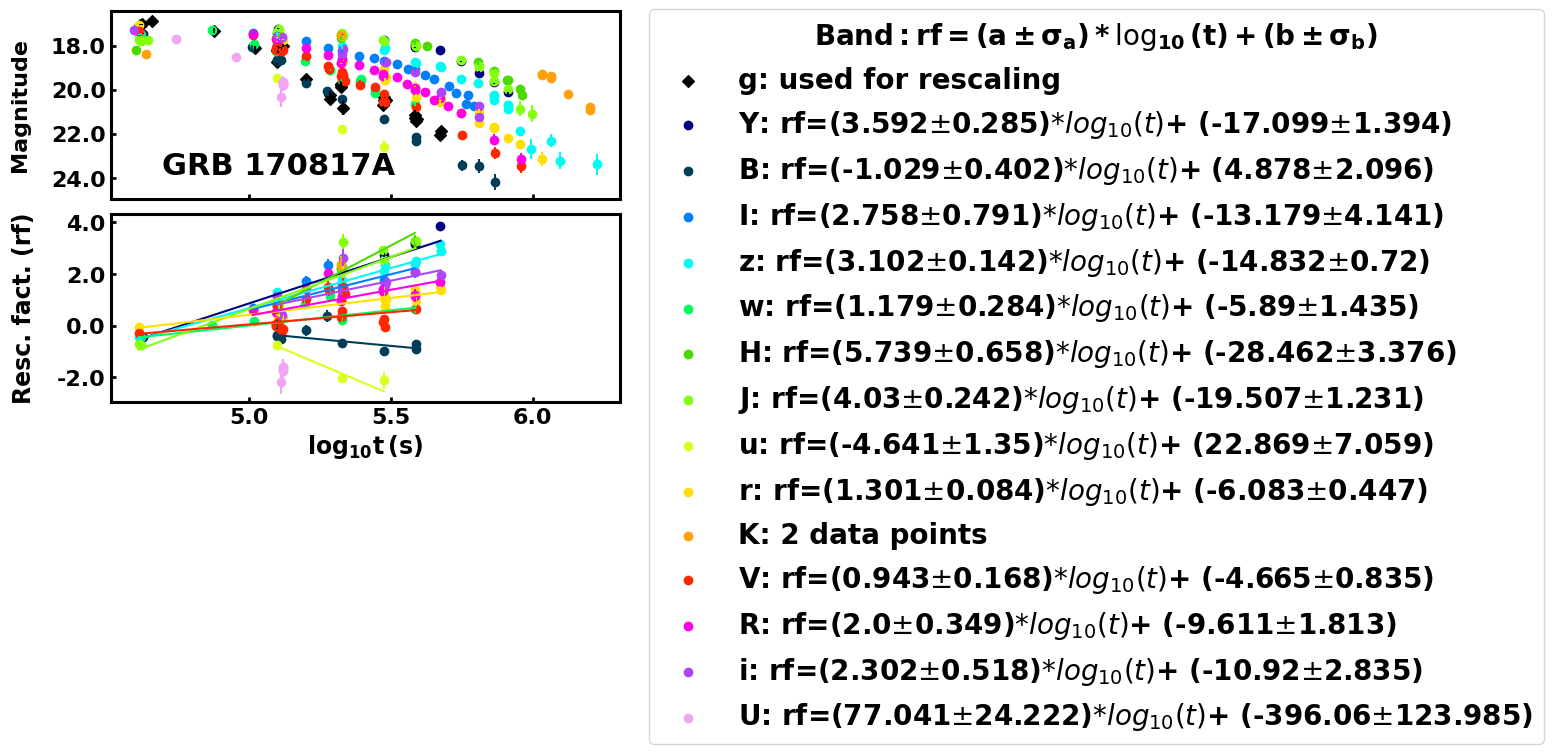

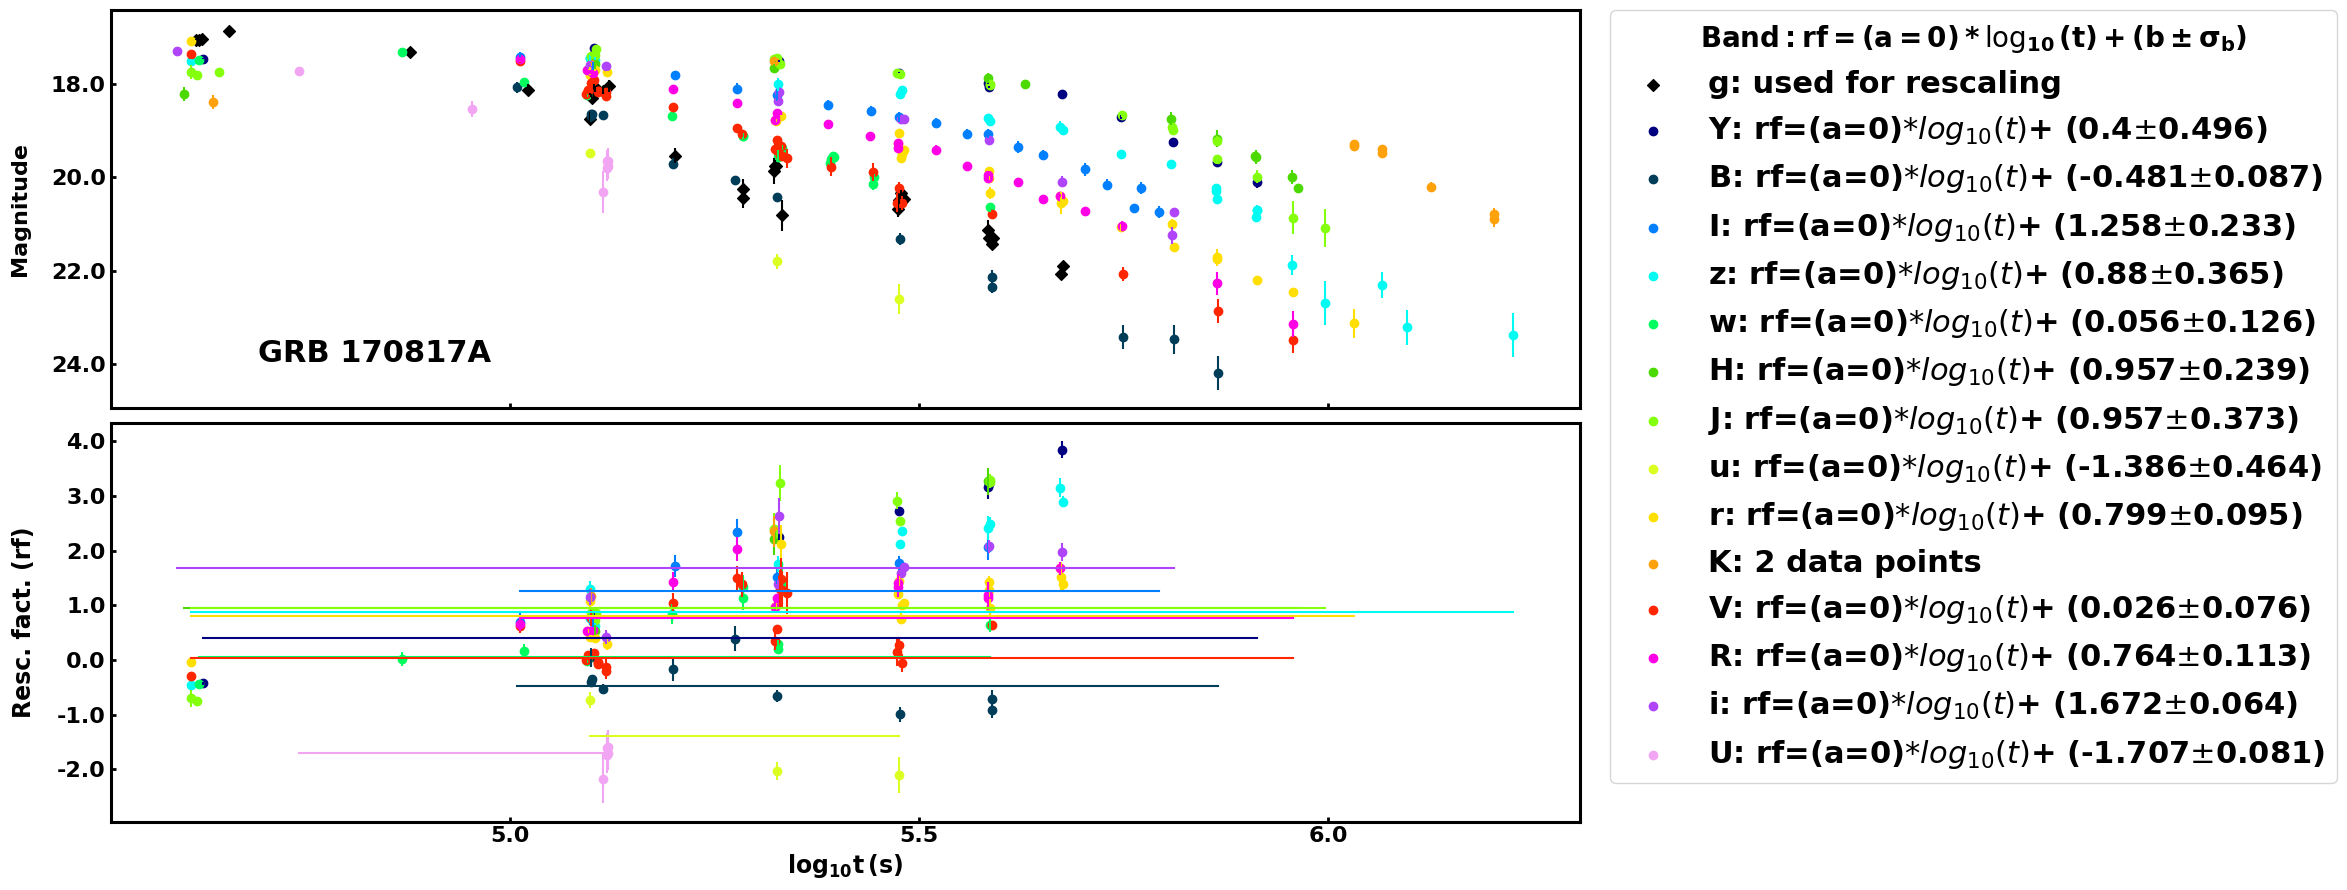

In [1]:
# analysing colour evolution

# initialise lightcurve object

from grblc.lightcurve import Lightcurve

grb = '170817A'
lc = Lightcurve(
    grb,
    path = 'converted',
    data_space = 'lin',
    appx_bands = True,
    save_in_folder = None
    )

fig, *__ = lc.colorevolGRB()

In [2]:
# rescaling GRB

figunresc, figresc, resc_mag_df = lc.rescaleGRB()

figunresc.show()
figresc.show()

Filters with no colour evolution:

['B']
